In [1]:
#importing modules
import numpy as np
import pandas as pd

In [2]:
#reading cvs file from desktop
df = pd.read_csv(r"C:\Users\HP\Desktop\py-master\ML\14_naive_bayes\spam.csv")
display(df)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
#knowing the value of spam and ham
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
#creating a new column and name it Spam and representing varaible spam(1) and ham(0)
df["Spam"] = df["Category"].apply(lambda x: 1 if x=="spam" else 0)

In [5]:
#displayin it
display(df)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [6]:
#importing module 
#spittling the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["Message"], df["Spam"],test_size=0.3 )

In [7]:
#checking the shape of x_train and y_train 
print(x_train.shape, y_train.shape)

(3900,) (3900,)


In [8]:
x_train[:5]

1388    Hope ur head doesn't hurt 2 much ! Am ploughin...
5156    Sir, I need Velusamy sir's date of birth and c...
1611                     I'll probably be around mu a lot
1603                            Ok pa. Nothing problem:-)
3218             Come to mahal bus stop.. &lt;DECIMAL&gt;
Name: Message, dtype: object

In [9]:
y_train[:5]

1388    0
5156    0
1611    0
1603    0
3218    0
Name: Spam, dtype: int64

In [10]:
type(x_train.values)

numpy.ndarray

In [11]:
type(y_train)

pandas.core.series.Series

In [12]:
#importing module 
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer
vector = CountVectorizer()
# Fit and transform the documents into a document-term matrix
x_train_vec = vector.fit_transform(x_train)

In [13]:
type(x_train_vec)

scipy.sparse._csr.csr_matrix

In [14]:
x_train_vec

<3900x7198 sparse matrix of type '<class 'numpy.int64'>'
	with 51839 stored elements in Compressed Sparse Row format>

In [15]:
type(x_train_vec)

scipy.sparse._csr.csr_matrix

In [16]:
# Convert the result to an array (optional)
x_train_np = x_train_vec.toarray()

In [17]:
type(x_train_np)

numpy.ndarray

In [18]:
x_train_np.shape

(3900, 7198)

In [19]:
dir(vector)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',

In [20]:
# checking dislike in bag_of_words dictionary
word = "dislike"
if word in vector.vocabulary_:
    print(f"'{word}' is in the vocabulary!")
else:
    print(f"'{word}' is not in the vocabulary.")

'dislike' is not in the vocabulary.


In [21]:
#create a naive bayes model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_vec, y_train)

MultinomialNB()

In [22]:
x_test_vec = vector.transform(x_test)

In [23]:
y_predict = model.predict(x_test_vec)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.89      0.94       219

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [25]:
cnn = confusion_matrix(y_test, y_predict)
cnn

array([[1450,    3],
       [  23,  196]], dtype=int64)

Text(20.72222222222222, 0.5, 'Truth')

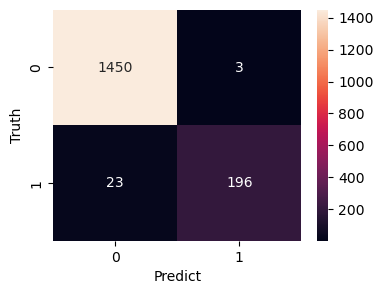

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize= [4,3])
sn.heatmap(cnn, annot=True, fmt="d"  )
plt.xlabel("Predict")
plt.ylabel("Truth")

In [27]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_vec = vector.transform(emails)
model.predict(emails_vec)

array([0, 1], dtype=int64)

In [28]:
#create  pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("Countvector",CountVectorizer()),
    ("Multinomial", MultinomialNB())
    ])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('Countvector', CountVectorizer()),
                ('Multinomial', MultinomialNB())])

In [29]:
y_predict = pipeline.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.89      0.94       219

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672

